<a href="https://colab.research.google.com/github/rnjsdmstj/ITB2022/blob/main/w15_%EA%B8%B0%EB%A7%90%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_team12_%EB%B6%84%EB%A5%98%EB%B6%84%EC%84%9D_%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 필수 실행 코드

In [ ]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf 

#해당 코드 실행 후 런타임을 다시 실행하면 한글이 깨지지 않음

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,963 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
#패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#파일 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **데이터 전처리0. charts.csv 전처리**

charts.csv: 1958년 8월 4일부터 2021년 11월 6일까지 매 주차 스포티파이 Top100 차트에 랭크된 곡에 대한 정보를 포함하고 있다. top100 아티스트와 곡 정보를 추출한 뒤 다른 데이터와 연결해 top100 차트인 여부를 판단하는 새로운 변수 top100 만들 때 활용하고자 한다

*   week: 해당 월 주차 수
*   date: 날짜
*   rank: 순위
*   song: 곡명
*   artist: 아티스트명
*   peak_rank: 최고 순위
*   weeks-on-board: Top100 차트인 기간


In [ ]:
#데이터 불러오기
charts = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/charts_new.csv",  encoding='cp949')

In [ ]:
#데이터 탐색하기
display(charts.head())

,week,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,1,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,1,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,1,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
#데이터 탐색하기2
charts.describe

<bound method NDFrame.describe of         week        date  rank                                 song  \
0          1  2021-11-06     1                           Easy On Me   
1          1  2021-11-06     2                                 Stay   
2          1  2021-11-06     3                        Industry Baby   
3          1  2021-11-06     4                           Fancy Like   
4          1  2021-11-06     5                           Bad Habits   
...      ...         ...   ...                                  ...   
330082     2  1958-08-04    96                        Over And Over   
330083     2  1958-08-04    97                     I Believe In You   
330084     2  1958-08-04    98                      Little Serenade   
330085     2  1958-08-04    99  I'll Get By (As Long As I Have You)   
330086     2  1958-08-04   100                                 Judy   

                               artist  last-week  peak-rank  weeks-on-board  
0                               Ade

**0-1) 적정한 기간 설정: 2000년 1월 ~ 2019년 12월까지 10년간의 데이터 추출**

In [ ]:
#date를 인덱스로 설정
charts = charts.set_index('date')

#기간에 맞는 행만 추출해 charts에 저장
charts = charts['2019-12-31':'2000-01-01']

#artist를 기준으로 중복되는 행 제거
charts.drop_duplicates(['artist'])

,week,rank,song,artist,last-week,peak-rank,weeks-on-board
date,,,,,,,
2019-12-28,5,1,All I Want For Christmas Is You,Mariah Carey,1.0,1,36
2019-12-28,5,2,Rockin' Around The Christmas Tree,Brenda Lee,3.0,2,31
2019-12-28,5,3,Circles,Post Malone,2.0,1,16
2019-12-28,5,4,Roxanne,Arizona Zervas,6.0,4,7
2019-12-28,5,5,Futsal Shuffle 2020,Lil Uzi Vert,NaN,5,1
...,...,...,...,...,...,...,...
2000-01-15,3,61,Heartbreaker,Mariah Carey Featuring Jay-Z,66.0,1,20
2000-01-15,3,78,15 Minutes,Marc Nelson,67.0,27,16
2000-01-15,3,92,A Country Boy Can Survive (Y2K Version),Chad Brock With Hank Williams Jr. & George Jones,75.0,75,3


**0-2) 데이터 분석에 사용할 변수만 추출: song, artist,rank**

In [ ]:
#칼럼 추출하기
charts = charts.loc[:,['song','artist','rank']]

display(charts.head())

,song,artist,rank
date,,,
2019-12-28,All I Want For Christmas Is You,Mariah Carey,1
2019-12-28,Rockin' Around The Christmas Tree,Brenda Lee,2
2019-12-28,Circles,Post Malone,3
2019-12-28,Roxanne,Arizona Zervas,4
2019-12-28,Futsal Shuffle 2020,Lil Uzi Vert,5


### **데이터 전처리1.spotify_artist 데이터 만들기**

feature_corel_100.csv는 12904명의 스포티파이 아티스트에 대한 통계적 정보를 보여준다. charts 데이터와 연결해 해당 아티스트가 2000~2019년 스포티파이 top100에 포함된 적이 있는 지를 판단하고자 한다.


*   name: 아티스트명
*   popularity: 아티스트 좋아요 수
*   followers: 아티스트 팔로워 수
*   num_release: 발매한 노래 수
*   pop_mean:발매한 노래의 좋아요 수 평균
*   fol_mean:?
*   rel_mean:?



In [ ]:
#feature_corel_100.csv파일 불러오기
feature = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/feature_corel_100.csv")

In [ ]:
#데이터 확인
print(feature)

            id                name  isdone               spotifyid  \
0       600808               Drake    True  3TVXtAsR1Inumwj472S9r4   
1       706819          Ed Sheeran    True  6eUKZXaKkcviH0Ku9w2n3V   
2       823336       Ariana Grande    True  66CXWjxzNUsdJxJ2JdwvnR   
3      1492430           Bad Bunny    True  4q3ewBCX7sLwd24euuV69X   
4       796889          The Weeknd    True  1Xyo4u8uXC1ZmMpatF05PJ   
...        ...                 ...     ...                     ...   
12900  1418260          Unreqvited    True  1ZYRTJCj869ya07OpEAlGR   
12901   844823  Show Me a Dinosaur    True  1wou9vWv5PgrTn3pu3TydQ   
12902  1796328              Flovry    True  2pLu3Ut2C3RviYZ3xUanBs   
12903   121805            The Bled    True  0EvGuw8fuWFtxhAsBOFTin   
12904    11473          Primordial    True  0BZr6WHaejNA63uhZZZZek   

                                                  genres  popularity  \
0      ['canadian hip hop', 'canadian pop', 'hip hop'...        98.0   
1              

**1-1) 데이터 분석에 사용할 변수만 추출: name, popularity, followers, num_release, pop_mean, fol_mean, rel_mean**

In [ ]:
feature = feature.loc[:,['name','popularity','followers','num_release','pop_mean','rel_mean','fol_mean']]

**1-2) 변수명 바꾸기**

In [ ]:
#name을 artist로 변수명 바꾸기
feature.rename(columns = {'name':'artist'},inplace=True)
display(feature.head())

,artist,popularity,followers,num_release,pop_mean,rel_mean,fol_mean
0,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07
1,Ed Sheeran,95.0,93327682.0,34,80.035714,44.035714,1.472265e+07
2,Ariana Grande,93.0,76626333.0,94,77.650000,51.900000,1.000831e+07
3,Bad Bunny,100.0,44516743.0,30,75.628571,23.142857,8.425305e+06
4,The Weeknd,98.0,42275433.0,108,81.928571,53.178571,1.363645e+07


**1-3) charts와 feature를 합친 새로운 데이터프레임 spotify_artist 만들기**


In [ ]:
#charts 데이터 복사하기
charts_1 = charts.copy()

#artist를 기준으로 데이터 합치기
spotify_artist = pd.merge(feature,charts_1,how='left',on='artist')
display(spotify_artist)

,artist,popularity,followers,num_release,pop_mean,rel_mean,fol_mean,song,rank
0,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,Behind Barz,83.0
1,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,Behind Barz,75.0
2,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,Trust Issues,58.0
3,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,How About Now,60.0
4,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,The Motion,61.0
...,...,...,...,...,...,...,...,...,...
66395,Unreqvited,32.0,20071.0,3,33.500000,3.500000,1.870100e+04,NaN,NaN
66396,Show Me a Dinosaur,31.0,10235.0,1,34.000000,4.500000,2.361900e+04,NaN,NaN
66397,Flovry,53.0,7478.0,1,62.000000,2.000000,5.242000e+03,NaN,NaN
66398,The Bled,32.0,33531.0,7,56.000000,8.000000,3.298930e+05,NaN,NaN


**1-4) spotify_artist 전처리: 새로운 변수 top-100 만들기**



In [ ]:
#새로운 열 추가
spotify_artist["top100"]=spotify_artist["rank"]

#조건에 맞는 값을 칼럼에 추가
spotify_artist['top100']=spotify_artist['top100'].fillna("No")
spotify_artist.loc[(spotify_artist['top100']!="No"),'top100']="Yes"


**1-5) spotify_artist 전처리: 불필요한 변수와 중복되는 행 제거**



In [ ]:
#불필요한 변수 제거
spotify_artist = spotify_artist.drop(columns = ['song','rank'],axis=0)

#artist를 기준으로 중복되는 행 제거
spotify_artist.drop_duplicates(['artist'])

,artist,popularity,followers,num_release,pop_mean,rel_mean,fol_mean,top100
0,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,Yes
707,Ed Sheeran,95.0,93327682.0,34,80.035714,44.035714,1.472265e+07,Yes
1068,Ariana Grande,93.0,76626333.0,94,77.650000,51.900000,1.000831e+07,Yes
1345,Bad Bunny,100.0,44516743.0,30,75.628571,23.142857,8.425305e+06,Yes
1350,The Weeknd,98.0,42275433.0,108,81.928571,53.178571,1.363645e+07,Yes
...,...,...,...,...,...,...,...,...
66395,Unreqvited,32.0,20071.0,3,33.500000,3.500000,1.870100e+04,No
66396,Show Me a Dinosaur,31.0,10235.0,1,34.000000,4.500000,2.361900e+04,No
66397,Flovry,53.0,7478.0,1,62.000000,2.000000,5.242000e+03,No
66398,The Bled,32.0,33531.0,7,56.000000,8.000000,3.298930e+05,No


### **데이터 전처리2. spotify_song 데이터 만들기**

songs_normalize.csv는 2000년부터 2019년까지 스포티파이에서 가장 인기있던 2000개의 곡에 대한 정보를 보여준다. charts 데이터와 연결해 해당 곡이 top100 차트에 오른 적이 있었는지를 판단하고자 한다. 

* popularity: 노래의 좋아요 수
* danceability
* energy
* key
* loudness
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo
* genre
* top100



In [ ]:
#songs_normalize.csv파일 불러오기
songs = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/songs_normalize.csv", encoding='cp949')

#데이터 탐색하기
display(songs.head())

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,FALSE,1999,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,FALSE,1999,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,FALSE,2000,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,FALSE,2000,65.0,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


**2-3) charts와 songs를 합친 새로운 데이터프레임 spotify_song 만들기**

In [ ]:
#charts 복사하기
charts_2 = charts.copy()

#'song'을 기준으로 데이터 합치기
spotify_song = pd.merge(songs,charts_2,how='left',on='song')
display(spotify_song)

,artist_x,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,artist_y,rank
0,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,96.0
1,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,90.0
2,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,85.0
3,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,77.0
4,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35593,Post Malone,Circles,215280,FALSE,2019,85.0,0.695,0.762,0.0,-3.497,1.0,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,7.0
35594,Post Malone,Circles,215280,FALSE,2019,85.0,0.695,0.762,0.0,-3.497,1.0,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,8.0
35595,Post Malone,Circles,215280,FALSE,2019,85.0,0.695,0.762,0.0,-3.497,1.0,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,9.0
35596,Post Malone,Circles,215280,FALSE,2019,85.0,0.695,0.762,0.0,-3.497,1.0,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,4.0


**2-4) spotify_song 전처리: 새로운 변수 top-100 만들기**



In [ ]:
#새로운 열 추가
spotify_song["top100"]=spotify_song["rank"]

#조건에 맞는 값을 칼럼에 추가
spotify_song['top100']=spotify_song['top100'].fillna("No")
spotify_song.loc[(spotify_song['top100']!="No"),'top100']="Yes"

display(spotify_song)

,artist_x,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,artist_y,rank,top100
0,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,96.0,Yes
1,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,90.0,Yes
2,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,85.0,Yes
3,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,77.0,Yes
4,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,49.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35593,Post Malone,Circles,215280,FALSE,2019,85.0,0.695,0.762,0.0,-3.497,...,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,7.0,Yes
35594,Post Malone,Circles,215280,FALSE,2019,85.0,0.695,0.762,0.0,-3.497,...,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,8.0,Yes
35595,Post Malone,Circles,215280,FALSE,2019,85.0,0.695,0.762,0.0,-3.497,...,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,9.0,Yes
35596,Post Malone,Circles,215280,FALSE,2019,85.0,0.695,0.762,0.0,-3.497,...,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,4.0,Yes


**2-5) spotify_song 전처리: 불필요한 변수와 중복되는 행 제거**



In [ ]:
#불필요한 변수 제거
spotify_song = spotify_song.drop(columns = ['artist_x','artist_y','rank','duration_ms','explicit','year','mode'],axis=0)

#중복되는 행 제거
spotify_song.drop_duplicates(['song'])

,song,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,top100
0,Oops!...I Did It Again,77.0,0.751,0.834,1.0,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,Yes
20,All The Small Things,79.0,0.434,0.897,0.0,-4.918,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",Yes
39,Breathe,66.0,0.529,0.496,7.0,-9.007,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",Yes
153,It's My Life,78.0,0.551,0.913,0.0,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",Yes
201,Bye Bye Bye,65.0,0.614,0.928,8.0,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35521,Sucker,79.0,0.842,0.734,1.0,-5.065,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,Yes
35559,Cruel Summer,78.0,0.552,0.702,9.0,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,Yes
35561,The Git Up,69.0,0.847,0.678,9.0,-8.635,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",Yes
35581,Dancing With A Stranger (with Normani),75.0,0.741,0.520,8.0,-7.513,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,No


### **분류분석1. spotify_artist**

### 분류 문제 선정: 아티스트의 성공 예측 및 전략 수립하기


* 종속변수: top-100 포함 여부

* 독립변수: popularity, followers, rel_mean, fol_mean

Yes: 2019년부터 2년간 1~11월의 첫째 주마다 top-100위를 기록한 가수들
No: top-100에 포함되지 않은 가수들


어떤 독립변수가 스포티파이 차트에서 높은 순위를 기록하는 데 영향을 줄 수 있는지 확인한다.

결과에 무관하게 세운 가정: 인기도가 높을수록 가수가 성공할 확률이 높을 것이기 때문에, 인기도가 top-100에 영향을 줄 것이다.

#### **1) 모델구축**

In [ ]:
print(spotify_artist.isnull().sum())

artist         0
popularity     0
followers      0
num_release    0
pop_mean       0
rel_mean       0
fol_mean       0
top100         0
dtype: int64


In [ ]:
display(spotify_artist.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66400 entries, 0 to 66399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   artist       66400 non-null  object 
 1   popularity   66400 non-null  float64
 2   followers    66400 non-null  float64
 3   num_release  66400 non-null  int64  
 4   pop_mean     66400 non-null  float64
 5   rel_mean     66400 non-null  float64
 6   fol_mean     66400 non-null  float64
 7   top100       66400 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 4.6+ MB


None

데이터의 불균형을 막기 위해 각 모델에 class_weigh = "balanced"를 적용할 예정

Yes    54266
No     12134
Name: top100, dtype: int64


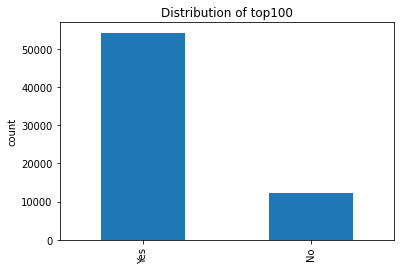

In [ ]:
print(spotify_artist['top100'].value_counts())

spotify_artist['top100'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of top100')
plt.show()

**1-1) 의사결정나무**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = spotify_artist.iloc[:, [1, 2, 3, 4, 5, 6]]  # 6개 변수 
y = spotify_artist.iloc[:, 7]   # top-100으로 설정

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(class_weight = "balanced", random_state=0)   #데이터 균형 맞춰주기
tree.fit(X_train, y_train)  #(학습용 데이터 작성)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.991


In [ ]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
#가중치 고려, 해당 모델 선택
tree = DecisionTreeClassifier(class_weight = "balanced", max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.942
시험용 데이터 정확도: 0.938


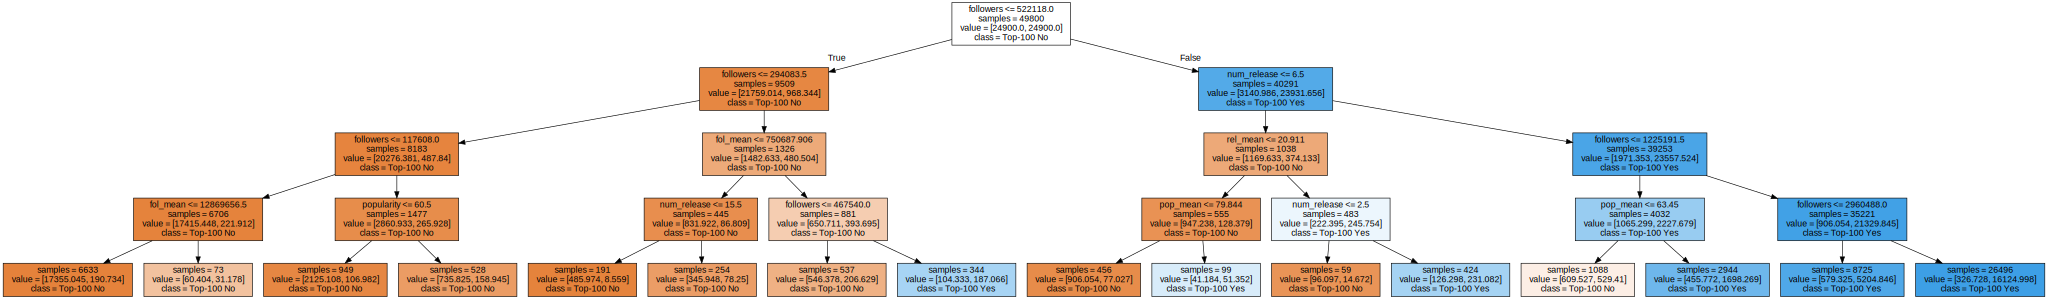

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Top-100 No", "Top-100 Yes"],
                feature_names=spotify_artist.columns[[1, 2, 3, 4, 5, 6]], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#(어떤 순서로 중요한지 확인 가능)

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00106963 0.90910089 0.06994522 0.00967656 0.00534101 0.00486669]


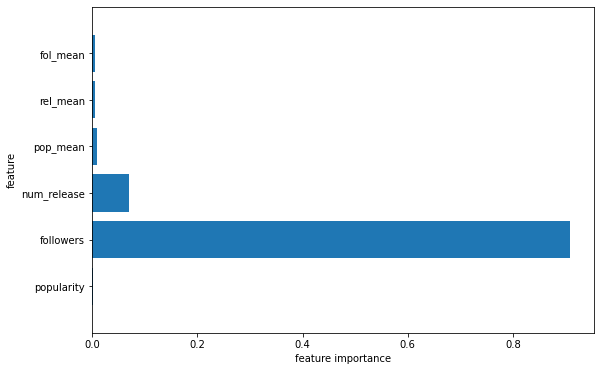

In [ ]:
import numpy as np

def plot_feature_importances_spotify_artist(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(spotify_artist.columns[[1, 2, 3, 4, 5, 6]])  # 6개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), spotify_artist.columns[[1, 2, 3, 4, 5, 6]])   # 6개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정

plot_feature_importances_spotify_artist(tree)

#(0이라고 해서 중요하지 않은 것 아님)

**1-2) 앙상블 모델: 랜덤 포레스트**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
forest = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.993


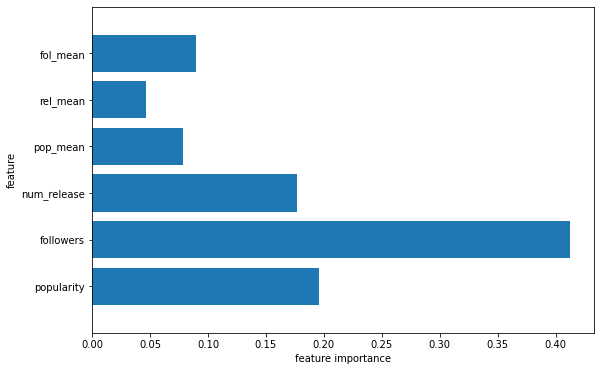

In [ ]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_spotify_artist(forest)

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.93935743 0.95783133 0.93795181 0.94236948 0.93955823 0.94016064
 0.9437751  0.94457831 0.93915663 0.94076305]
Random forest:  [0.99538153 0.99437751 0.9935743  0.99598394 0.99297189 0.99317269
 0.9935743  0.99417671 0.9939759  0.99417671]
Accuracy mean
Decision tree :0.943
Random forest :0.994


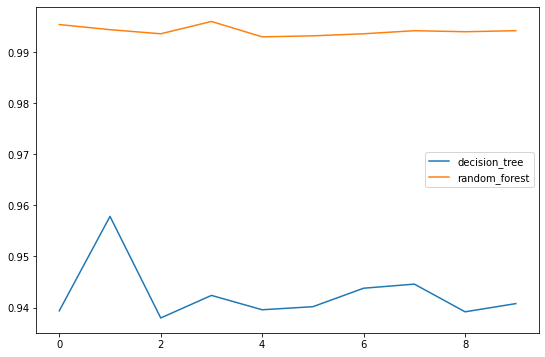

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

**1-3) 앙상블 모델: 그래디언트 부스팅**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.971
시험용 데이터 세트 정확도: 0.968


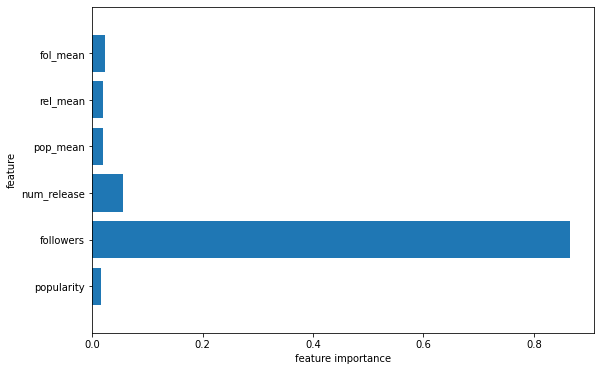

In [ ]:
plot_feature_importances_spotify_artist(gbrt)

In [ ]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.961
시험용 데이터 세트 정확도: 0.960


In [ ]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.958
시험용 데이터 세트 정확도: 0.956


#### **2) 모델평가**

**2-1) 교차검증**

In [ ]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.93935743 0.95783133 0.93795181 0.94236948 0.93955823 0.94016064
 0.9437751  0.94457831 0.93915663 0.94076305]
Random forest:  [0.99538153 0.99437751 0.9935743  0.99598394 0.99297189 0.99317269
 0.9935743  0.99417671 0.9939759  0.99417671]
Gradient boosting:  [0.96907631 0.96947791 0.96646586 0.96927711 0.96586345 0.96907631
 0.96706827 0.97188755 0.96787149 0.96927711]
Accuracy mean
Decision tree :0.943
Random forest :0.994
Gradient boosting :0.969


**2-2) 그리드서치**

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.954920,11,0.954880,0.954578,0.955301
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.961486,5,0.961988,0.960361,0.962108
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.968896,1,0.968976,0.968494,0.969217
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.954799,12,0.954880,0.954096,0.955422
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.960361,7,0.961024,0.959096,0.960964
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.967329,2,0.966807,0.966506,0.968675
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.954759,13,0.954699,0.953976,0.955602
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.958193,9,0.958916,0.957470,0.958193
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.965622,3,0.965361,0.965422,0.966084
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.953012,14,0.952771,0.951867,0.954398


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.9689


**2-3) 모델평가지표: 정오분류표**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

Yes    13535
No      3065
Name: top100, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.938
[[ 2833   232]
 [  796 12739]]
Random forest 시험용 데이터 세트 정확도:0.994
[[ 2967    98]
 [    6 13529]]
Gradient boosting 시험용 데이터 세트 정확도:0.968
[[ 2680   385]
 [  152 13383]]


In [ ]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["No", "Yes"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["No", "Yes"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["No", "Yes"]))

Decision Tree:
              precision    recall  f1-score   support

          No       0.78      0.92      0.85      3065
         Yes       0.98      0.94      0.96     13535

    accuracy                           0.94     16600
   macro avg       0.88      0.93      0.90     16600
weighted avg       0.94      0.94      0.94     16600

Random Forest:
              precision    recall  f1-score   support

          No       1.00      0.97      0.98      3065
         Yes       0.99      1.00      1.00     13535

    accuracy                           0.99     16600
   macro avg       1.00      0.98      0.99     16600
weighted avg       0.99      0.99      0.99     16600

Gradient Boosting:
              precision    recall  f1-score   support

          No       0.95      0.87      0.91      3065
         Yes       0.97      0.99      0.98     13535

    accuracy                           0.97     16600
   macro avg       0.96      0.93      0.94     16600
weighted avg       0.97  

#### 분류 모델 선택 및 평가 결과

* 선택한 평가: Accuracy(정확도) 
* 최적의 분류모델: 그래디언트 부스팅

교차검증과 정오분류표 평가를 시도한 결과, 랜덤 포레스트 모델에서의 정확도가 0.994로 가장 높았으나, 과적합 문제가 발생할 가능성이 있기 때문에 그래디언트 부스팅 모델을 선택하게 되었다. 그래디언트부스팅 모델은 학습용 데이터 모델의 정확도가 0.971, 시험용 데이터 모델의 정확도가 0.968로 과적합 문제가 비교적 발생하지 않을 것으로 보인다.


#### 인사이트 도출

### **분류분석 2.spotify_song**

In [ ]:
print(spotify_song.isnull().sum())

song                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
top100              0
dtype: int64


In [ ]:
# 결측치 열 전체 삭제
spotify_song = spotify_song.dropna(axis=1)   #열삭제의 경우 axis =1 
print("결측열 모두 제거: ", songs.shape)    # 결측치 모두 없어졌는지 확인

print(spotify_song.isnull().sum())

결측열 모두 제거:  (2000, 14)
song                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
top100              0
dtype: int64


In [ ]:
display(spotify_song.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35598 entries, 0 to 35597
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song              35598 non-null  object 
 1   popularity        35598 non-null  float64
 2   danceability      35598 non-null  float64
 3   energy            35598 non-null  float64
 4   key               35598 non-null  float64
 5   loudness          35598 non-null  float64
 6   speechiness       35598 non-null  float64
 7   acousticness      35598 non-null  float64
 8   instrumentalness  35598 non-null  float64
 9   liveness          35598 non-null  float64
 10  valence           35598 non-null  float64
 11  tempo             35598 non-null  object 
 12  top100            35598 non-null  object 
dtypes: float64(10), object(3)
memory usage: 3.8+ MB


None

Yes    34726
No       872
Name: top100, dtype: int64


Text(0.5, 1.0, 'Distribution of top100')

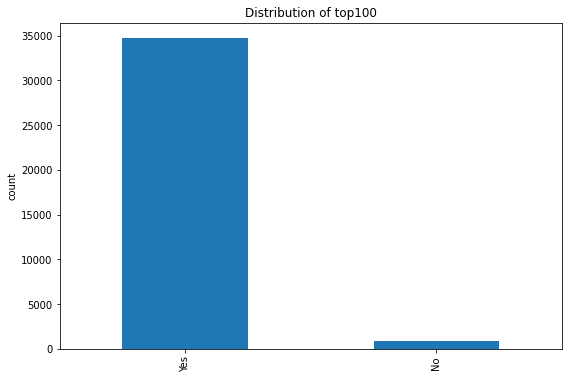

In [ ]:
print(spotify_song['top100'].value_counts())

spotify_song['top100'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of top100')

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE # oversampling에서 많이 사용되는 알고리즘

X = spotify_song.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10]]  # 9개 변수 
y = spotify_song.iloc[:, 12]   # top-100으로 설정

Under= RandomUnderSampler(random_state=0)
X, y = Under.fit_resample(X, y)
print(y.value_counts(()))

#Over = SMOTE(random_state=0)
#X, y = Over.fit_resample(X, y)
#print(y.value_counts(())) # 과적합이 심해짐

No     872
Yes    872
Name: top100, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(class_weight = "balanced", random_state=0)   #데이터 균형 맞춰주기
tree.fit(X_train, y_train)  #(학습용 데이터 작성)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.999
시험용 데이터 정확도: 0.697


In [ ]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
#가중치 고려, 해당 모델 선택
tree = DecisionTreeClassifier(class_weight = "balanced", max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.608
시험용 데이터 정확도: 0.528


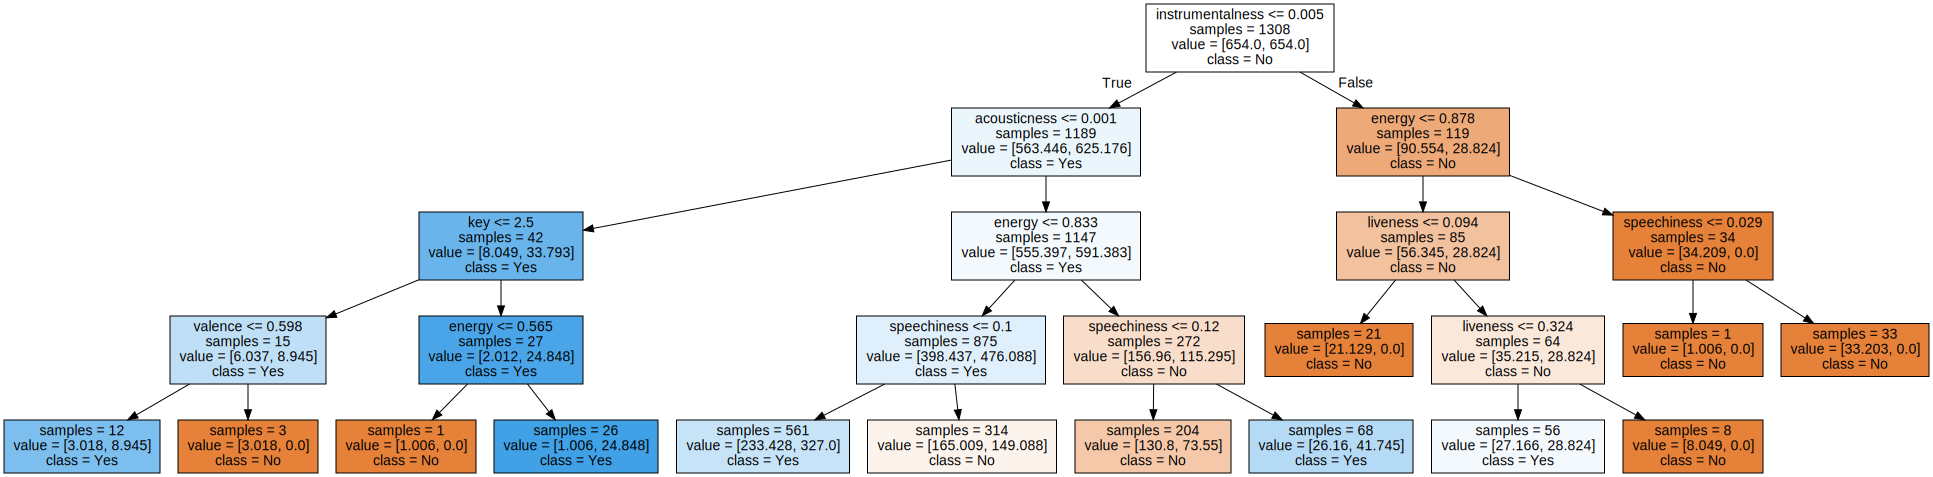

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "No", "Yes"],
                feature_names=spotify_song.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10]], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#(어떤 순서로 중요한지 확인 가능)

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.20946614 0.03223066 0.         0.17733353 0.10716104
 0.2735079  0.15833205 0.04196868]


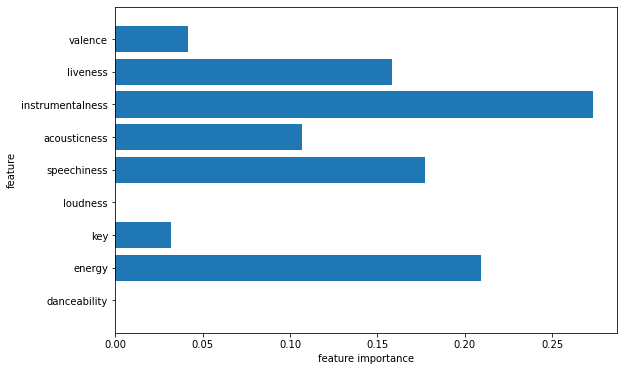

In [ ]:
import numpy as np

def plot_feature_importances_spotify_song(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(spotify_song.columns[[2 ,3, 4, 5, 6, 7, 8, 9, 10]])  # 9개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), spotify_song.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10]])   # 9개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정

plot_feature_importances_spotify_song(tree)

#(0이라고 해서 중요하지 않은 것 아님)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.999
시험용 데이터 세트 정확도: 0.681


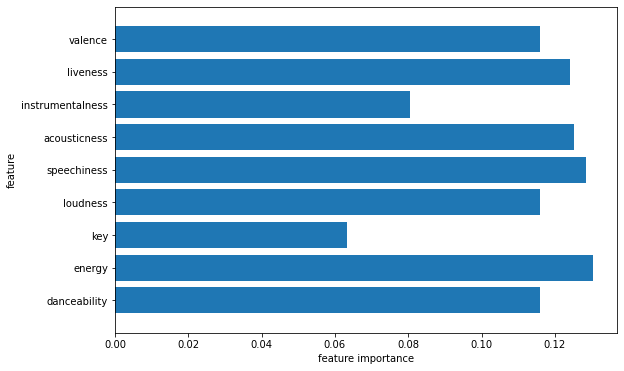

In [ ]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_spotify_song(forest)

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean()))
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.48854962 0.51908397 0.51908397 0.52671756 0.53435115 0.49618321
 0.48854962 0.61068702 0.53076923 0.55384615]
Random forest:  [0.67938931 0.6870229  0.70229008 0.70992366 0.76335878 0.70229008
 0.67175573 0.72519084 0.71538462 0.67692308]
Accuracy mean
Decision tree :0.527
Random forest :0.703


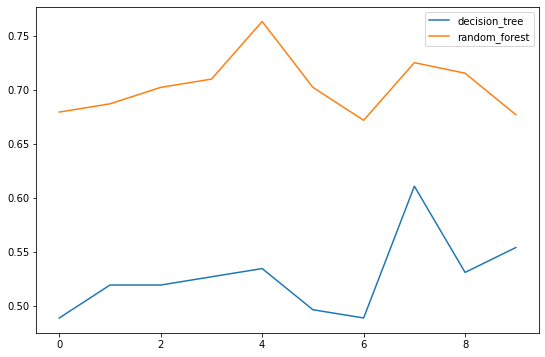

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.849
시험용 데이터 세트 정확도: 0.651


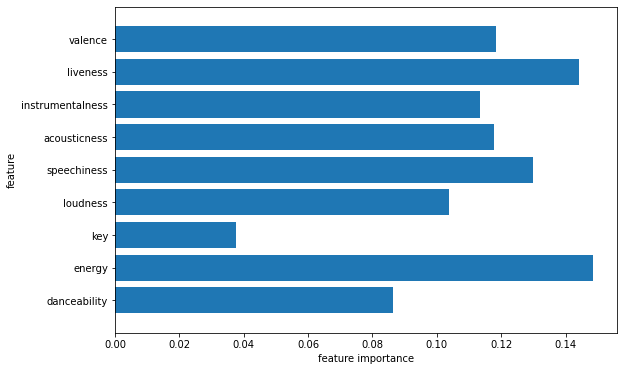

In [ ]:
plot_feature_importances_spotify_song(gbrt)

In [ ]:
#나무 깊이 제한 - 사용하지 않기
#gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
#gbrt.fit(X_train, y_train)

#print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
#print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test))) # 나무깊이 제안은 하지 않는 것이 좋음

학습 데이터 세트 정확도: 0.748
시험용 데이터 세트 정확도: 0.601


In [ ]:
#학습률 감소 - 사용하지 않기
#gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
#gbrt.fit(X_train, y_train)

#print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
#print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test))) 

학습 데이터 세트 정확도: 0.636
시험용 데이터 세트 정확도: 0.555


In [ ]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) #교순님이 다른 측정지표 추천하심

Accuracy
Decision tree:  [0.48854962 0.51908397 0.51908397 0.52671756 0.53435115 0.49618321
 0.48854962 0.61068702 0.53076923 0.55384615]
Random forest:  [0.67938931 0.6870229  0.70229008 0.70992366 0.76335878 0.70229008
 0.67175573 0.72519084 0.71538462 0.67692308]
Gradient boosting:  [0.54961832 0.5648855  0.51145038 0.57251908 0.60305344 0.5648855
 0.51145038 0.65648855 0.54615385 0.61538462]
Accuracy mean
Decision tree :0.527
Random forest :0.703
Gradient boosting :0.570


In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.566514,11,0.538991,0.573394,0.587156
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.577217,8,0.571101,0.557339,0.603211
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.604740,1,0.605505,0.580275,0.628440
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.561927,13,0.550459,0.555046,0.580275
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.585627,6,0.577982,0.559633,0.619266
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.599388,2,0.600917,0.584862,0.612385
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.559633,14,0.543578,0.557339,0.577982
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.588685,5,0.573394,0.566514,0.626147
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.590979,4,0.603211,0.561927,0.607798
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.562691,12,0.545872,0.559633,0.582569


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.651


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 Yes, No 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

No     222
Yes    214
Name: top100, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.528
[[ 95 127]
 [ 79 135]]
Random forest 시험용 데이터 세트 정확도:0.681
[[148  74]
 [ 65 149]]
Gradient boosting 시험용 데이터 세트 정확도:0.651
[[130  92]
 [ 60 154]]


In [ ]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["No", "Yes"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["No", "Yes"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["No", "Yes"]))

Decision Tree:
              precision    recall  f1-score   support

          No       0.55      0.43      0.48       222
         Yes       0.52      0.63      0.57       214

    accuracy                           0.53       436
   macro avg       0.53      0.53      0.52       436
weighted avg       0.53      0.53      0.52       436

Random Forest:
              precision    recall  f1-score   support

          No       0.69      0.67      0.68       222
         Yes       0.67      0.70      0.68       214

    accuracy                           0.68       436
   macro avg       0.68      0.68      0.68       436
weighted avg       0.68      0.68      0.68       436

Gradient Boosting:
              precision    recall  f1-score   support

          No       0.68      0.59      0.63       222
         Yes       0.63      0.72      0.67       214

    accuracy                           0.65       436
   macro avg       0.66      0.65      0.65       436
weighted avg       0.66  